<a href="https://colab.research.google.com/github/Alan-Bravo-Tec/Data-Mining-Python/blob/main/03_CLasificacion_EDA_PrediccionDeDesercionDeEmpleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Estudio de caso de deserción de empleados de recursos humanos
### Contexto :
Una empresa multinacional busca reducir los costos de retención de personal sin afectar el talento clave. Para ello, se propone identificar empleados con alto riesgo de abandonar la organización y dirigir incentivos únicamente a ese grupo. Como científico de datos del área de Recursos Humanos, tu tarea es analizar los factores asociados a la deserción y predecir la probabilidad de abandono de cada empleado.

### Objetivo :

Analizar los datos proporcionados para identificar los diferentes factores que impulsan la deserción y construir un modelo que pueda ayudar a predecir la deserción.


### Conjunto de datos:
Los datos contienen detalles demográficos, métricas relacionadas con el trabajo y un indicador de deserción.

* EmployeeNumber - Identificador del empleado
* Attrition - ¿El empleado ha renunciado?
* Age - Edad del empleado
* BusinessTravel - Compromisos de viaje para el trabajo
* DailyRate - Descripción de datos no disponible
* Department - Departmento del empleado
* DistanceFromHome - Distancia del trabajo a casa (en km)
* Education - 1-Bow College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Campo de educación
* EmployeeCount - Recuento de empleados
* EnvironmentSatisfaction - 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
* Gender - Género del empleado
* HourlyRate - Descripción de datos no disponible
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Nivel de trabajo (1 to 5)
* JobRole - Roles de trabajo
* JobSatisfaction - 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
* MaritalStatus - Estado civil
* MonthlyIncome - Salario mensual
* MonthlyRate - Descripción de datos no disponible
* NumCompaniesWorked - Número de empresas en las que ha trabajado
* Over18 - ¿Mayores de 18 años?
* OverTime - ¿Horas extras?
* PercentSalaryHike - Porcentaje de aumento del salario en el último año
* PerformanceRating - 1-Bajo, 2-Bueno, 3-Excelente, 4-Excelente
* RelationshipSatisfaction - 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
* StandardHours - Horas estándar
* StockOptionLevel - Nivel óptimo de stock
* TotalWorkingYears - Total de años trabajados
* TrainingTimesLastYear - Número de capacitaciones a las que asistió el año pasado
* WorkLifeBalance - 1-Bajo, 2-Bueno, 3-Excelente, 4-Excelente
* YearsAtCompany - Años en la compañía
* YearsInCurrentRole - Años en el puesto actual
* YearsSinceLastPromotion - Años desde la última promoción
* YearsWithCurrManager - Años con el gerente actual

## **Importación de las bibliotecas y descripción general del conjunto de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Cargando el conjunto de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/Datos /HR_Employee_Attrition_Dataset.xlsx')

In [ ]:
df.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

### **Comprobar la información del conjunto de datos**

In [ ]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observaciones:**

- Hay **2940 observaciones y 34 columnas** en el conjunto de datos.
- Todas las columnas tienen 2940 valores no nulos, es decir, **no faltan valores en los datos.**

**Valores únicos en cada columna**

In [ ]:
# Checar los valores únicos en cada columna
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

**Observaciones:**

- **El número de empleado es un identificador** único para cada empleado y **podemos eliminar esta columna** ya que no agregaría ningún valor a nuestro análisis.
- **Over18 y StandardHours tienen solo 1 valor único.** Estas columnas no agregarán ningún valor a nuestro modelo, por lo tanto, podemos eliminarlas.
- Over18 y StandardHours tienen solo 1 valor único. Podemos eliminar estas columnas ya que no agregarán ningún valor a nuestro análisis.
- Sobre la base del número de valores únicos en cada columna y la descripción de los datos, podemos identificar las columnas continuas y categóricas en los datos.

**Eliminar las columnas mencionadas anteriormente** y definamos listas para columnas numéricas y categóricas para explorarlas por separado.

In [ ]:
# Eliminar columnas
df=df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
# Variables numericas
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

# VAriables categegoricas
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

## **Análisis exploratorio de datos y preprocesamiento de datos**

### **Análisis univariado de columnas numéricas**

In [ ]:
# Estadisticas Básicas
df[num_cols].describe().T

count          mean          std     min     25%  \
DailyRate                2940.0    802.485714   403.440447   102.0   465.0   
Age                      2940.0     36.923810     9.133819    18.0    30.0   
DistanceFromHome         2940.0      9.192517     8.105485     1.0     2.0   
MonthlyIncome            2940.0   6502.931293  4707.155770  1009.0  2911.0   
MonthlyRate              2940.0  14313.103401  7116.575021  2094.0  8045.0   
PercentSalaryHike        2940.0     15.209524     3.659315    11.0    12.0   
TotalWorkingYears        2940.0     11.279592     7.779458     0.0     6.0   
YearsAtCompany           2940.0      7.008163     6.125483     0.0     3.0   
NumCompaniesWorked       2940.0      2.693197     2.497584     0.0     1.0   
HourlyRate               2940.0     65.891156    20.325969    30.0    48.0   
YearsInCurrentRole       2940.0      4.229252     3.622521     0.0     2.0   
YearsSinceLastPromotion  2940.0      2.187755     3.221882     0.0     0.0   
YearsWithCurrManager     2940.0      4.123129     3.567529     0.0     2.0   
TrainingTimesLastYear    2940.0      2.799320     1.289051     0.0     2.0   

                             50%      75%      max  
DailyRate                  802.0   1157.0   1499.0  
Age                         36.0     43.0     60.0  
DistanceFromHome             7.0     14.0     29.0  
MonthlyIncome             4919.0   8380.0  19999.0  
MonthlyRate              14235.5  20462.0  26999.0  
PercentSalaryHike           14.0     18.0     25.0  
TotalWorkingYears           10.0     15.0     40.0  
YearsAtCompany               5.0      9.0     40.0  
NumCompaniesWorked           2.0      4.0      9.0  
HourlyRate                  66.0     84.0    100.0  
YearsInCurrentRole           3.0      7.0     18.0  
YearsSinceLastPromotion      1.0      3.0     15.0  
YearsWithCurrManager         3.0      7.0     17.0  
TrainingTimesLastYear        3.0      3.0      6.0

**Observaciones:**

- **La edad promedio de los empleados es de alrededor de 37 años**. Tiene un rango alto, de 18 años a 60 años, lo que indica una buena diversidad de edad en la organización.
- **Al menos el 50% de los empleados viven en un radio de 7 KM** de la organización. Sin embargo, existen algunos valores extremos, dado que el valor máximo es de 29 km.
- **El ingreso promedio mensual de un empleado es de USD 6500.** Tiene un alto rango de valores de 1K-20K USD, lo cual es de esperar para la distribución de ingresos de cualquier organización. Hay una gran diferencia entre el valor del tercer cuartil (alrededor de USD 8400) y el valor máximo (casi USD 20 000), lo que demuestra que **las personas con mayores ingresos de la empresa tienen un ingreso desproporcionadamente alto** en comparación con el resto de los empleados. Nuevamente, esto es bastante común en la mayoría de las organizaciones.
- **El aumento salarial promedio de un empleado es de alrededor del 15 %.** Al menos el 50 % de los empleados obtuvo un aumento salarial del 14 % o menos, siendo el aumento salarial máximo del 25 %.
- La media de años de vinculación de un empleado a la empresa es de 7.
- **En promedio, la cantidad de años desde que un empleado obtuvo una promoción es ~2.19**. La mayoría de los empleados han sido promovidos desde el último año.

**Distribuciones de las variables**

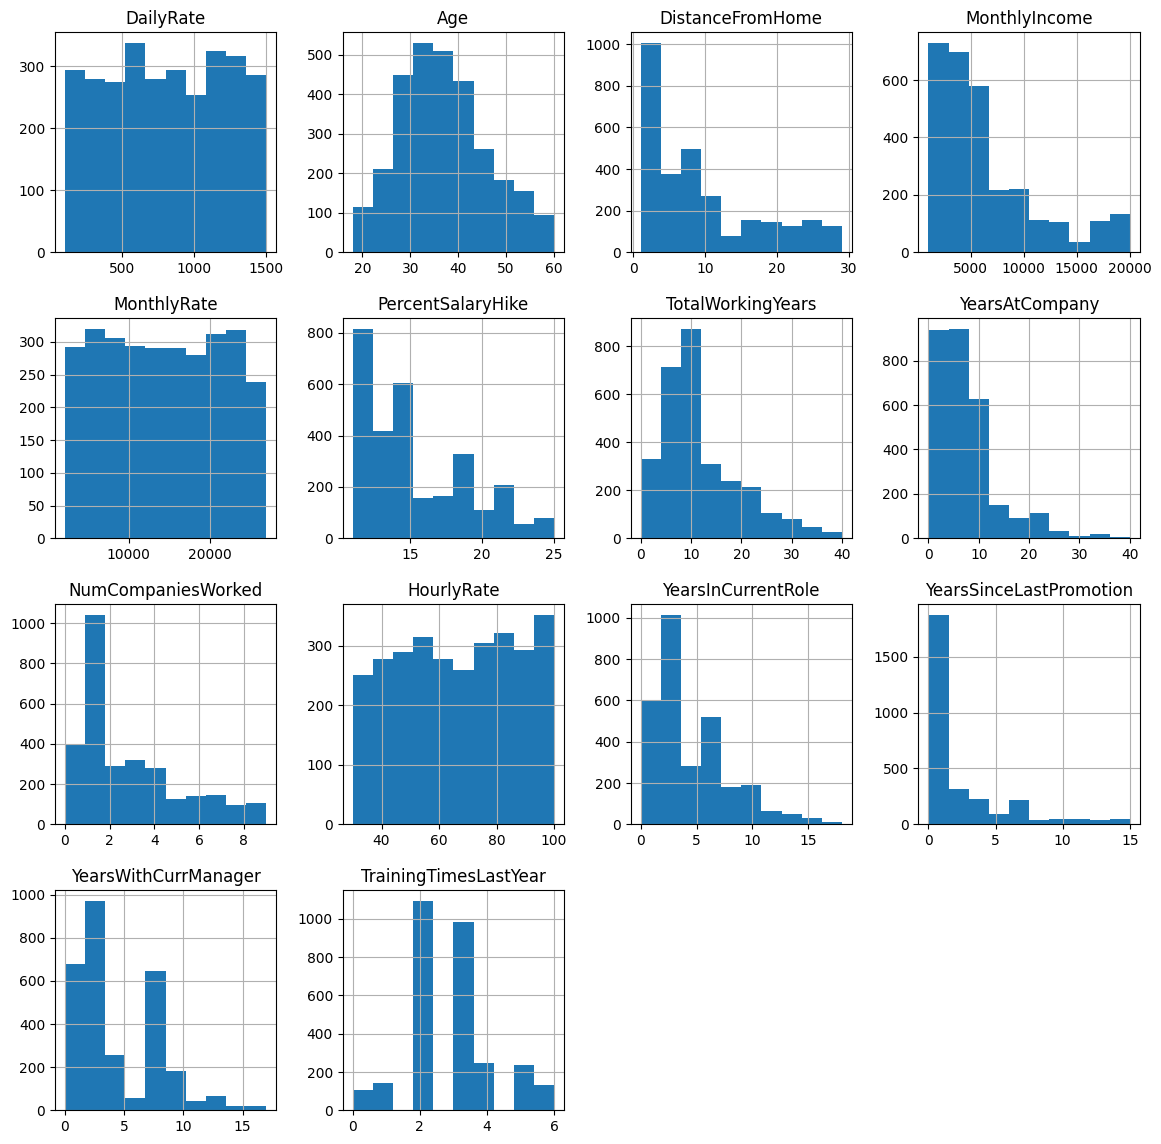

In [ ]:
# Crear histogramas
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observaciones:**

- **La distribución por edades es cercana a una distribución normal** con la mayoría de los empleados entre 25 y 50 años.

- **El porcentaje de aumento salarial está sesgado a la derecha**, lo que implica que los empleados obtienen aumentos menores.

- **MonthlyIncome y TotalWorkingYears están sesgados a la derecha**, lo que indica que la mayoría de los trabajadores se encuentran en puestos de nivel inicial/medio en la organización.

- **DistanceFromHome también tiene una distribución sesgada a la derecha**, lo que significa que la mayoría de los empleados viven cerca del trabajo, pero hay algunos que viven más lejos.

- **En promedio, un empleado ha trabajado en 2,5 empresas.** La mayoría de los empleados han trabajado en solo 1 empresa.

- **La distribución de la variable YearsAtCompany muestra una buena proporción de trabajadores con más de 10 años**, lo que indica un número significativo de empleados leales a la organización.

- **La distribución YearsInCurrentRole tiene tres picos en 0, 2 y 7.** Hay algunos empleados que han permanecido en el mismo rol durante 15 años o más.

- **La distribución de la variable YearsSinceLastPromotion indica que algunos empleados no han recibido un ascenso en 10-15 años y todavía están trabajando en la organización.** Se supone que estos empleados son empleados con mucha experiencia laboral en la alta gerencia roles, como cofundadores, empleados de C-suite, etc.

- Las distribuciones de TarifaDiaria, TarifaHora y TarifaMensual parecen ser uniformes y no brindan mucha información. Podría ser que la tarifa diaria se refiera a los ingresos obtenidos por día adicional trabajado, mientras que la tarifa por hora podría referirse al mismo concepto que se aplica a las horas extra trabajadas por día. Dado que estas tasas tienden a ser muy similares para varios empleados en el mismo departamento, eso explica la distribución uniforme que muestran.

### **Análisis univariante para variables categóricas**

In [ ]:
# Imprimir el % de valores por cada categoria
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
****************************************
OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64
****************************************
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
****************************************
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
****************************************
Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: proportion, dtype: float64
****************************************
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64
************************

**Observaciones:**

- **La tasa de deserción de empleados es del 16%.**
- **Alrededor del 28 % de los empleados trabajan horas extras.** Este número parece estar en el lado superior y podría indicar una vida laboral estresada por parte de los empleados.
- El 71% de los empleados ha viajado pocas veces, mientras que alrededor del 19% tiene que viajar con frecuencia.
- Alrededor del 73% de los empleados provienen de una formación académica en los campos de Ciencias de la Vida y Medicina.
- Más del 65% de los empleados trabajan en el departamento de Investigación y Desarrollo de la organización.
- **Cerca del 40% de los empleados tienen una satisfacción laboral y ambiental baja (1) o media-baja (2)** en la organización, lo que indica que la moral de la empresa parece estar algo baja.
- **Más del 30% de los empleados muestran una implicación laboral baja (1) a media-baja (2).**
- Más del 80% de los empleados no tienen o tienen muy pocas opciones sobre acciones.
- **En términos de calificaciones de desempeño, ninguno de los empleados tiene una calificación inferior a 3 (excelente).** Alrededor del 85% de los empleados tienen una calificación de desempeño igual a 3 (excelente), mientras que el resto tiene una calificación de 4 (sobresaliente). Esto podría significar que la mayoría de los empleados tienen un desempeño superior, o el escenario más probable es que la organización podría ser muy indulgente con su proceso de evaluación del desempeño.

### **Análisis bivariado y multivariado**
Observar cómo se relaciona la tasa de deserción con otras variables categóricas.

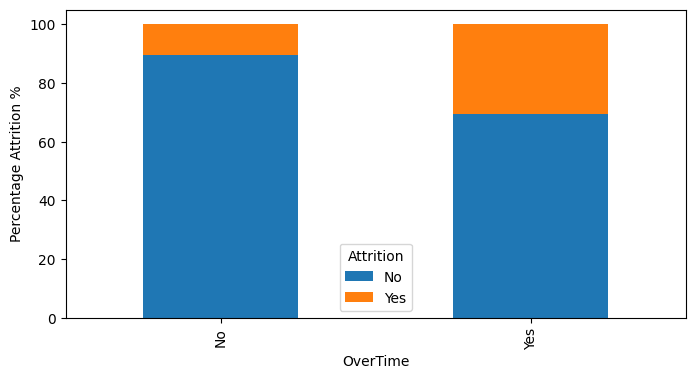

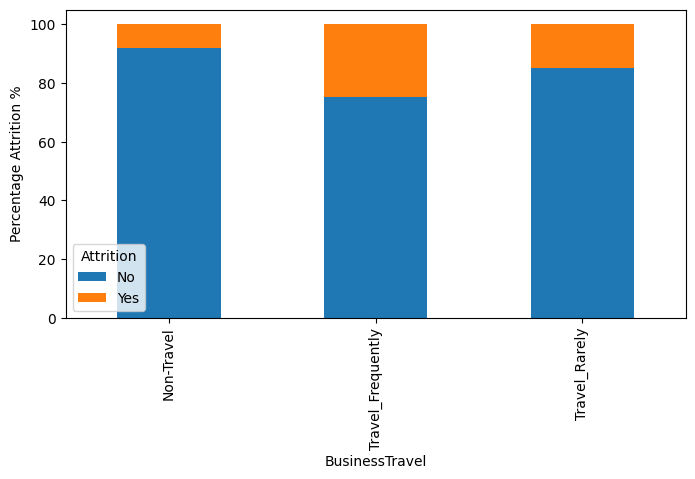

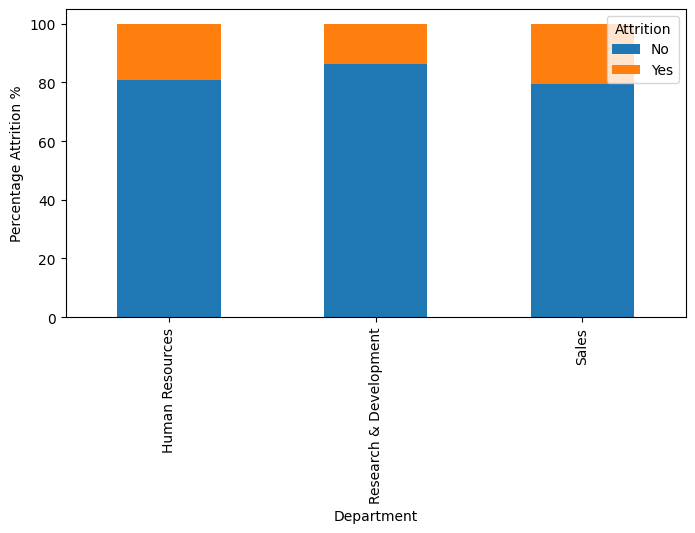

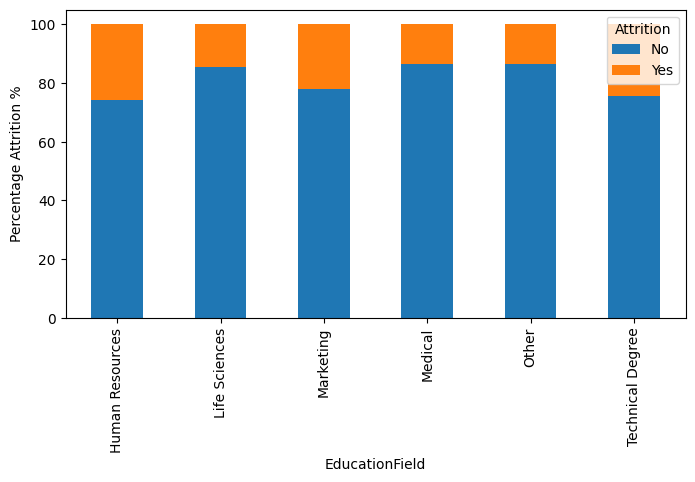

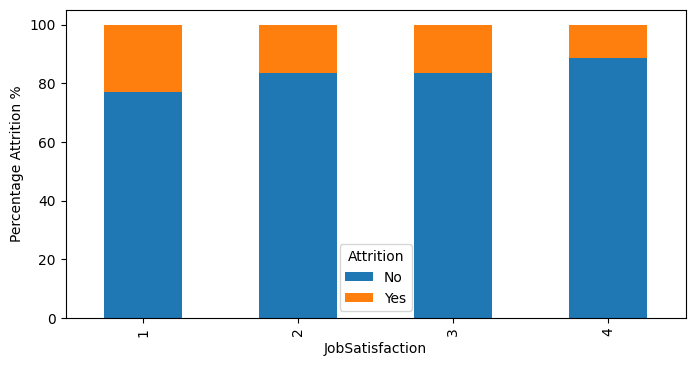

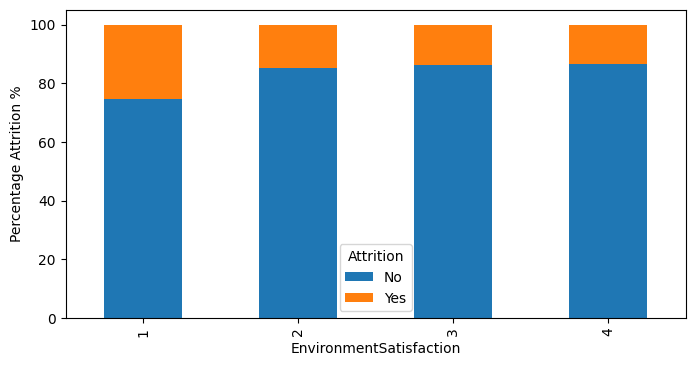

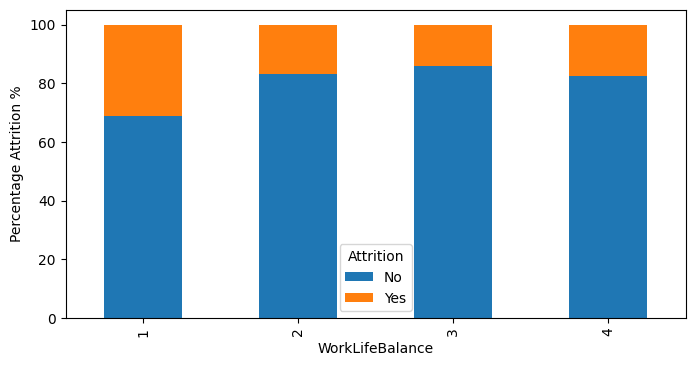

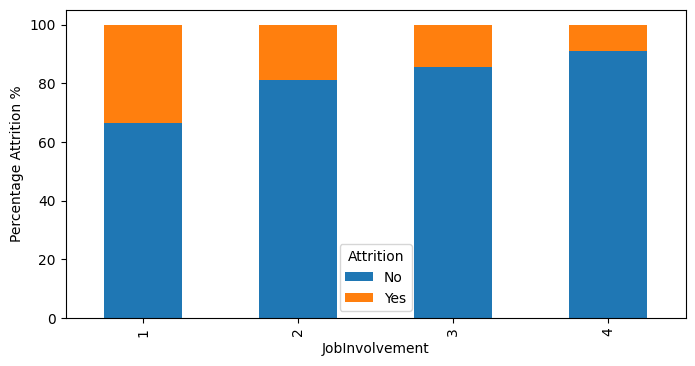

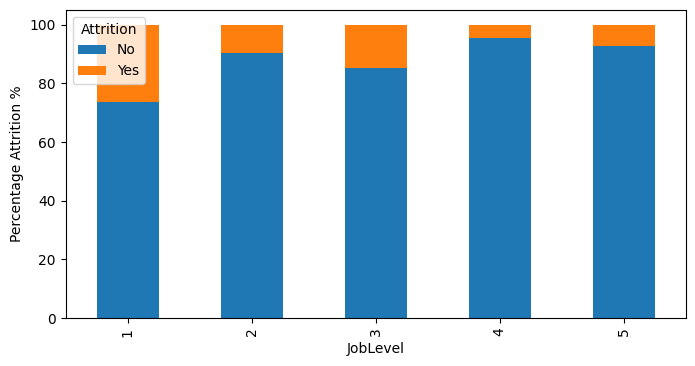

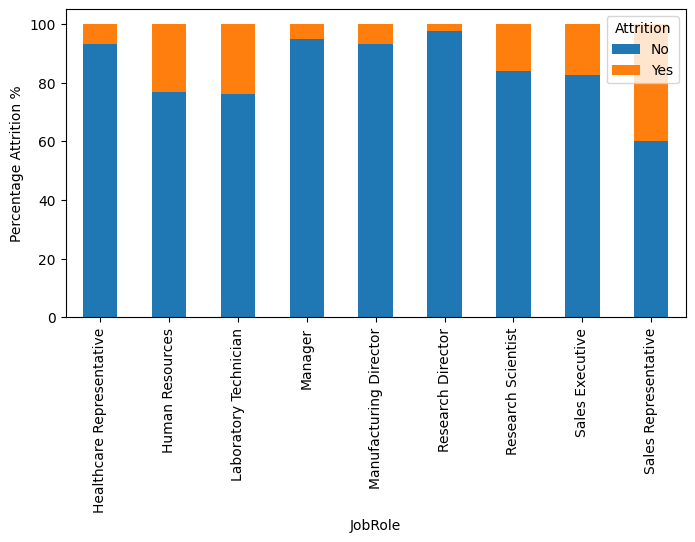

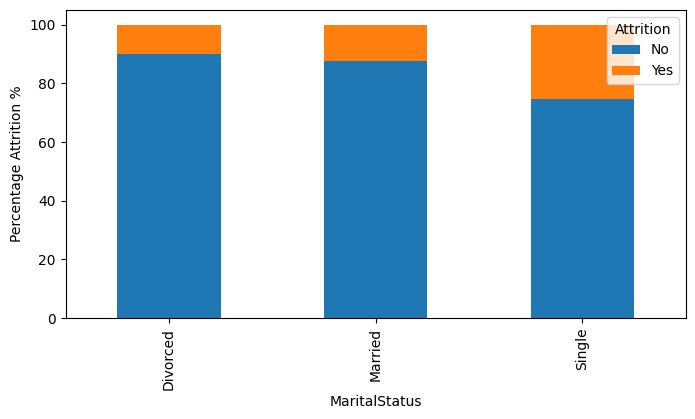

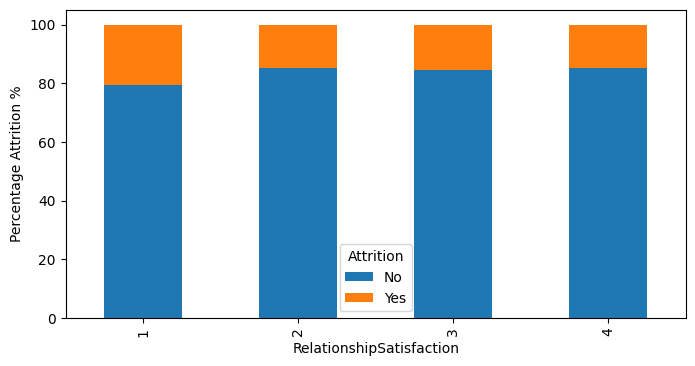

In [ ]:
for i in cat_cols:
    if i!='Attrition':
        (pd.crosstab(df[i],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

**Observaciones:**
    
- **Los empleados que trabajan horas extra tienen más de un 30 % de posibilidades de deserción**,
lo cual es muy alto en comparación con el 10% de probabilidad de abandono de los empleados que no trabajan horas extra.
- Como se vio anteriormente, la mayoría de los empleados trabajan para el departamento de I+D. La posibilidad de desgaste allí es ~ 15%
- **Los empleados que trabajan como representantes de ventas tienen una tasa de deserción de alrededor del 40 %** mientras que los RRHH y los técnicos tienen una tasa de deserción de alrededor del 25 %. Los departamentos de ventas y recursos humanos tienen tasas de deserción más altas en comparación con un departamento académico como Investigación y Desarrollo, una observación que tiene sentido intuitivo si se tienen en cuenta las diferencias en esos perfiles de trabajo. La naturaleza de alta presión y basada en incentivos de los roles de Ventas y Marketing puede estar contribuyendo a sus tasas de deserción más altas.
- **Cuanto menor es la participación laboral del empleado, mayores parecen ser sus posibilidades de deserción, y los empleados con participación laboral calificada como 1 pierden un 35 %.** La razón de esto podría ser que los empleados con menor participación laboral pueden sentirse excluidos o menos valorados y ya han comenzado a explorar nuevas opciones, lo que lleva a una mayor tasa de deserción.
- **Los empleados en un nivel de trabajo más bajo también pierden más,** con los empleados de JobLevel calificados como 1 que muestran una probabilidad de abandono de casi el 25 %. Estos pueden ser empleados jóvenes que tienden a explorar más opciones en las etapas iniciales de sus carreras.
- **Una calificación baja de equilibrio entre la vida laboral y personal claramente lleva a los empleados a la deserción**, el 30 % de los que están en la categoría 1 muestra la deserción.

**Veamos la relación entre la deserción y las variables numéricas**

In [ ]:
# promedio de las variables numericas por attrition
df.groupby(['Attrition'])[num_cols].mean()

DailyRate        Age  DistanceFromHome  MonthlyIncome  \
Attrition                                                           
No         812.504461  37.561233          8.915653    6832.739659   
Yes        750.362869  33.607595         10.632911    4787.092827   

            MonthlyRate  PercentSalaryHike  TotalWorkingYears  YearsAtCompany  \
Attrition                                                                       
No         14265.779400          15.231144          11.862936        7.369019   
Yes        14559.308017          15.097046           8.244726        5.130802   

           NumCompaniesWorked  HourlyRate  YearsInCurrentRole  \
Attrition                                                       
No                   2.645580   65.952149            4.484185   
Yes                  2.940928   65.573840            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  \
Attrition                                                  
No                        2.234388              4.367397   
Yes                       1.945148              2.852321   

           TrainingTimesLastYear  
Attrition                         
No                      2.832928  
Yes                     2.624473

**Observaciones:**
- **Los empleados que dejan la empresa tienen un ingreso promedio casi un 30 % más bajo y un 30 % menos de experiencia laboral que los que no lo hacen.** Estos podrían ser los empleados que buscan explorar nuevas opciones y/o aumentar su salario con un cambio de compañía.
- **Los empleados que muestran deserción también tienden a vivir un 16 % más lejos de la oficina que los que no lo están**. El viaje más largo hacia y desde el trabajo podría significar que tienen que gastar más tiempo/dinero todos los días, y esto podría generar insatisfacción laboral y querer dejar la organización.

### **Relación entre diferentes variables numéricas**

In [ ]:
# Correlacion entre variables numricas
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

<Axes: >

**Observaciones:**

- **La experiencia laboral total, los ingresos mensuales, los años en la empresa y los años con el gerente actual están altamente correlacionados entre sí y con la edad del empleado**, lo cual es fácil de entender ya que estas variables muestran un aumento con la edad para la mayoría de los empleados .
- Los años en la empresa y los años en el puesto actual se correlacionan con los años transcurridos desde la última promoción, lo que significa que la empresa no está dando promociones en el momento adecuado.

**Ahora hemos explorado nuestros datos. Construyamos el modelo**

## **Construcción de modelos - Enfoque**

1. Preparación de datos.
2. Divida los datos en un conjunto de entrenamiento y prueba.
3. Construya un modelo sobre los datos del entrenamiento.
4. Ajuste el modelo si es necesario.
5. Pruebe los datos en el equipo de prueba.

### **Preparación de datos**

**Creación de variables ficticias para variables categóricas**

In [ ]:
# Crear variables dummy
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapear variables
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

**Separando las variables independientes (X) y la variable dependiente (Y)**

In [ ]:
# Separar la variable objetivos de las demas

Y= df.Attrition
X= df.drop(columns = ['Attrition'])

**Dividir los datos en 70 % de entrenamiento y 30 % de conjunto de prueba**

Algunos problemas de clasificación pueden exhibir un gran desequilibrio en la distribución de las clases objetivo: por ejemplo, podría haber varias veces más muestras negativas que muestras positivas. En tales casos, se recomienda utilizar la técnica de **muestreo estratificado** para garantizar que las frecuencias de clase relativas se conserven aproximadamente en cada entrenamiento y pliegue de validación.

In [ ]:
# Separar los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Escalando los datos**

Las variables independientes en este conjunto de datos tienen diferentes escalas. Cuando las características tienen escalas diferentes entre sí, existe la posibilidad de que se otorgue una mayor ponderación a las características que tienen una magnitud más alta, y dominarán sobre otras características cuyos cambios de magnitud pueden ser menores pero cuyos cambios porcentuales pueden ser igual de significativos o incluso más grande. Esto afectará el rendimiento de nuestro algoritmo de aprendizaje automático y no queremos que nuestro algoritmo esté sesgado hacia una característica.

La solución a este problema es **Feature Scaling**, es decir, escalar el conjunto de datos para dar a cada variable transformada una escala comparable.

Los modelos basados ​​en árboles como **Decision Trees** y **Random Forest** no requieren que se realice el escalado de características, ya que no son sensibles a la variación en los datos.

Escalaremos los datos para **Regresión logística** y **SVM**. Usaremos el método **Standard Scaler**, que centra y escala el conjunto de datos usando el Z-Score. Estandariza las características restando la media y escalándola para tener una varianza unitaria. La puntuación estándar de la muestra x se calcula como:

> **z = (x - u) / s**

donde **u** es la media de las muestras de entrenamiento (cero) y **s** es la desviación estándar de las muestras de entrenamiento.

In [ ]:
# Escalar los datos
sc=StandardScaler()


X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 1189 to 2736
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                2058 non-null   int64
 1   DailyRate                          2058 non-null   int64
 2   DistanceFromHome                   2058 non-null   int64
 3   HourlyRate                         2058 non-null   int64
 4   JobSatisfaction                    2058 non-null   int64
 5   MonthlyIncome                      2058 non-null   int64
 6   MonthlyRate                        2058 non-null   int64
 7   NumCompaniesWorked                 2058 non-null   int64
 8   OverTime                           2058 non-null   int64
 9   PercentSalaryHike                  2058 non-null   int64
 10  PerformanceRating                  2058 non-null   int64
 11  RelationshipSatisfaction           2058 non-null   int64
 12  StockOptionLevel      

1. Pedecir que un empleado abandonará
2. Predecir que un empleado no abandonará

cuando predecimos que el empleado no abandonará pero abandona
utilizamos recall para FP (False Positive)
recall - busca la taza de verdaderos positivos

In [ ]:
def metrics_score(actual, predicted, labels=None):
    print("\nReporte de clasificación:")
    print(metrics.classification_report(actual, predicted, target_names=labels if labels is not None else None))

    cm = metrics.confusion_matrix(actual, predicted)
    print("\nMatriz de confusión:")
    print(cm)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=labels if labels is not None else sorted(set(actual)),
                yticklabels=labels if labels is not None else sorted(set(actual)),
                cmap="Blues")
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.title('Matriz de Confusión')
    plt.show()


In [ ]:
#Regresion logistica//Categorica binaria// Regresa el porcentaje de probabilidad de que el renglon ppermanezca a una clase u otra

lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)



LogisticRegression()

In [ ]:
y_proba_train = lg.predict_proba(X_train_scaled)
proba_df = pd.DataFrame(y_proba_train, columns=lg.classes_)
proba_df.head(20)

0         1
0   0.998191  0.001809
1   0.904085  0.095915
2   0.483072  0.516928
3   0.868112  0.131888
4   0.934171  0.065829
5   0.999395  0.000605
6   0.894114  0.105886
7   0.897167  0.102833
8   0.965980  0.034020
9   0.994107  0.005893
10  0.884571  0.115429
11  0.974724  0.025276
12  0.996541  0.003459
13  0.988028  0.011972
14  0.924096  0.075904
15  0.999056  0.000944
16  0.970243  0.029757
17  0.945518  0.054482
18  0.067127  0.932873
19  0.784210  0.215790

In [ ]:
y_pred_tain = lg.predict(X_train_scaled)
print(y_pred_tain.shape)
y_pred_tain

(2058,)


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_tain
             ,'Prob_0': y_proba_train[:,0], 'Prob_1':y_proba_train[:,1]}).head(10)

Actual  Predicted    Prob_0    Prob_1
1189       0          0  0.998191  0.001809
598        1          0  0.904085  0.095915
859        0          1  0.483072  0.516928
1123       0          0  0.868112  0.131888
1229       0          0  0.934171  0.065829
529        0          0  0.999395  0.000605
1475       0          0  0.894114  0.105886
1478       0          0  0.897167  0.102833
461        0          0  0.965980  0.034020
708        0          0  0.994107  0.005893

In [ ]:
X_train.iloc[[1189, 598]]

Age  DailyRate  DistanceFromHome  HourlyRate  JobSatisfaction  \
1308   38        723                 2          77                4   
2472   35        200                18          60                4   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
1308           5405         4244                   2         1   
2472           9362        19944                   2         0   

      PercentSalaryHike  ...  JobRole_Human Resources  \
1308                 20  ...                    False   
2472                 11  ...                    False   

      JobRole_Laboratory Technician  JobRole_Manager  \
1308                          False            False   
2472                          False            False   

      JobRole_Manufacturing Director  JobRole_Research Director  \
1308                           False                      False   
2472                            True                      False   

      JobRole_Research Scientist  JobRole_Sales Executive  \
1308                       False                    False   
2472                       False                    False   

      JobRole_Sales Representative  MaritalStatus_Married  \
1308                          True                   True   
2472                         False                  False   

      MaritalStatus_Single  
1308                 False  
2472                  True  

[2 rows x 54 columns]


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.91      0.98      0.94      1726
    Attition       0.81      0.50      0.62       332

    accuracy                           0.90      2058
   macro avg       0.86      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058


Matriz de confusión:
[[1686   40]
 [ 166  166]]


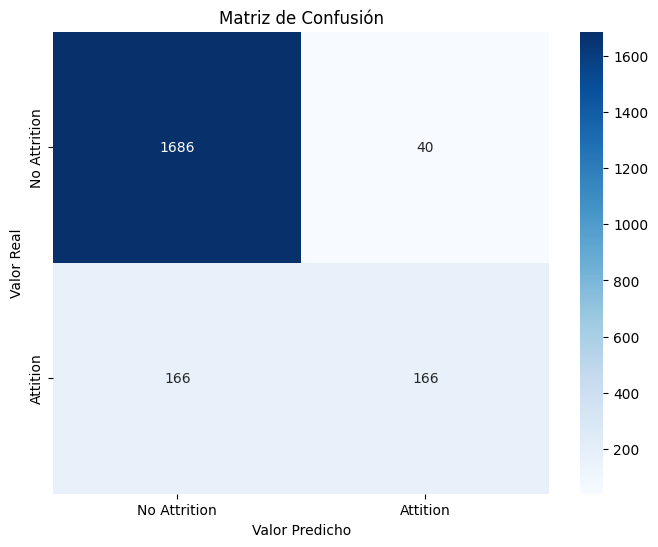

In [ ]:
metrics_score(y_train, y_pred_tain, labels=['No Attrition','Attition'])

In [ ]:
y_pred_test = lg.predict(X_test_scaled)
metrics_score(y_test, y_pred_test, labels=['No Attrition','Attition'])



Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.90      0.97      0.93       740
    Attition       0.73      0.46      0.57       142

    accuracy                           0.89       882
   macro avg       0.82      0.72      0.75       882
weighted avg       0.88      0.89      0.88       882


Matriz de confusión:
[[716  24]
 [ 76  66]]


In [ ]:
pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_tain
             ,'Prob_0': y_proba_train[:,0], 'Prob_1':y_proba_train[:,1]}).head(10)

Actual  Predicted    Prob_0    Prob_1
1189       0          0  0.998191  0.001809
598        1          0  0.904085  0.095915
859        0          1  0.483072  0.516928
1123       0          0  0.868112  0.131888
1229       0          0  0.934171  0.065829
529        0          0  0.999395  0.000605
1475       0          0  0.894114  0.105886
1478       0          0  0.897167  0.102833
461        0          0  0.965980  0.034020
708        0          0  0.994107  0.005893

In [ ]:
y_pred_test.shape

(882,)

In [ ]:
#Coeficiente para la clase positiva
coef_lg = lg.coef_
pd.DataFrame(coef_lg, columns=X.columns).T.sort_values(by=0, ascending=False)

0
OverTime                           0.959813
BusinessTravel_Travel_Frequently   0.715594
MaritalStatus_Single               0.612941
YearsSinceLastPromotion            0.548358
YearsAtCompany                     0.518351
NumCompaniesWorked                 0.499555
Department_Research & Development  0.443697
BusinessTravel_Travel_Rarely       0.440205
Department_Sales                   0.436376
JobRole_Sales Executive            0.397936
DistanceFromHome                   0.385084
MaritalStatus_Married              0.286715
JobLevel_5                         0.279558
JobRole_Human Resources            0.264813
JobRole_Laboratory Technician      0.187027
JobRole_Sales Representative       0.185754
Gender_Male                        0.165196
Education_3                        0.158683
Education_2                        0.130788
JobRole_Manufacturing Director     0.113799
Education_4                        0.113649
Education_5                        0.092047
EducationField_Technical Degree    0.074374
MonthlyRate                        0.059012
HourlyRate                         0.048250
JobLevel_3                         0.015339
EducationField_Marketing          -0.023921
JobRole_Manager                   -0.030842
PerformanceRating                 -0.033681
PercentSalaryHike                 -0.073709
DailyRate                         -0.095693
StockOptionLevel                  -0.111651
EducationField_Other              -0.141616
JobLevel_4                        -0.150793
WorkLifeBalance                   -0.212193
JobRole_Research Scientist        -0.224776
TrainingTimesLastYear             -0.242203
Age                               -0.272715
RelationshipSatisfaction          -0.312702
EducationField_Life Sciences      -0.334055
JobRole_Research Director         -0.349921
EducationField_Medical            -0.367708
JobSatisfaction                   -0.374684
YearsWithCurrManager              -0.382831
YearsInCurrentRole                -0.429374
EnvironmentSatisfaction_2         -0.450471
JobInvolvement_2                  -0.478873
EnvironmentSatisfaction_3         -0.496994
TotalWorkingYears                 -0.504693
MonthlyIncome                     -0.602496
EnvironmentSatisfaction_4         -0.650321
JobInvolvement_4                  -0.652201
JobLevel_2                        -0.705429
JobInvolvement_3                  -0.746196

In [ ]:
#Buscar los odd ratio (razones de probabilidad)
#odd > 1 aumenta la probabilidad
#odd < 1 disminuye la probabilidad
#odd = 1 sin efecto
odds = np.exp(coef_lg)
pd.DataFrame(odds, columns=X.columns).T.sort_values(by=0, ascending=False)

0
OverTime                           2.611209
BusinessTravel_Travel_Frequently   2.045400
MaritalStatus_Single               1.845852
YearsSinceLastPromotion            1.730410
YearsAtCompany                     1.679255
NumCompaniesWorked                 1.647989
Department_Research & Development  1.558459
BusinessTravel_Travel_Rarely       1.553026
Department_Sales                   1.547090
JobRole_Sales Executive            1.488748
DistanceFromHome                   1.469737
MaritalStatus_Married              1.332045
JobLevel_5                         1.322545
JobRole_Human Resources            1.303188
JobRole_Laboratory Technician      1.205660
JobRole_Sales Representative       1.204126
Gender_Male                        1.179624
Education_3                        1.171966
Education_2                        1.139726
JobRole_Manufacturing Director     1.120527
Education_4                        1.120359
Education_5                        1.096416
EducationField_Technical Degree    1.077210
MonthlyRate                        1.060788
HourlyRate                         1.049433
JobLevel_3                         1.015457
EducationField_Marketing           0.976363
JobRole_Manager                    0.969629
PerformanceRating                  0.966880
PercentSalaryHike                  0.928942
DailyRate                          0.908743
StockOptionLevel                   0.894356
EducationField_Other               0.867955
JobLevel_4                         0.860025
WorkLifeBalance                    0.808809
JobRole_Research Scientist         0.798695
TrainingTimesLastYear              0.784896
Age                                0.761310
RelationshipSatisfaction           0.731468
EducationField_Life Sciences       0.716014
JobRole_Research Director          0.704744
EducationField_Medical             0.692320
JobSatisfaction                    0.687506
YearsWithCurrManager               0.681928
YearsInCurrentRole                 0.650916
EnvironmentSatisfaction_2          0.637328
JobInvolvement_2                   0.619481
EnvironmentSatisfaction_3          0.608357
TotalWorkingYears                  0.603691
MonthlyIncome                      0.547444
EnvironmentSatisfaction_4          0.521878
JobInvolvement_4                   0.520898
JobLevel_2                         0.493897
JobInvolvement_3                   0.474167

In [ ]:
#Curva precision recall
y_scores_lg = lg.predict_proba(X_train_scaled)
preciscions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

In [ ]:
#Graficar la curva Precision Recall
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, preciscions_lg[:-1], "b--", label="Precision")
plt.plot(thresholds_lg, recalls_lg[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

* Azul (precision): ¿Cuantos de los que dijimos que se iban realmente se fueron?  Verdaderos Positivos

* Verde (recall): ¿De todos los que si se fueron, cuantos se dectectaron?


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.93      0.93      0.93      1726
    Attition       0.65      0.64      0.64       332

    accuracy                           0.89      2058
   macro avg       0.79      0.79      0.79      2058
weighted avg       0.89      0.89      0.89      2058


Matriz de confusión:
[[1611  115]
 [ 120  212]]


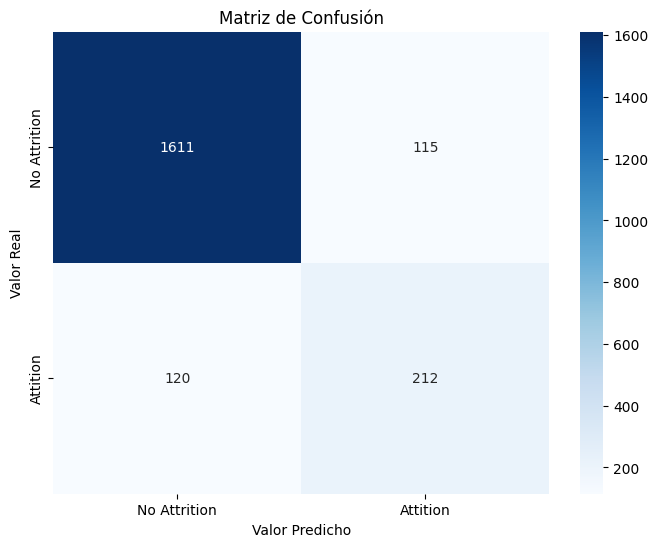

In [ ]:
optimal_threshold = .35
y_pred_optimal = lg.predict_proba(X_train_scaled)[:,1] >= optimal_threshold
metrics_score(y_train, y_pred_optimal, labels=['No Attrition','Attition'])

* Estoy dispuesto a considerar un caso como clase 1 aunque el modelo solo tenga un 35% de certeza.
* Prefiero no perder ningún posible positivo, aunque eso implique aumentar los falsos positivos.

### **Árbol de decisión**

In [ ]:
#Construir un modelo de Arbol de Decision
dt = DecisionTreeClassifier(random_state=1,class_weight={0:0.17, 1:0.83}, max_depth=10)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=10,
                       random_state=1)

In [ ]:
print (dt.get_depth())
print (dt.get_n_leaves())

10
134


In [ ]:
#Ver el perfomance del modelo
y_pred_train = dt.predict(X_train_scaled)
metrics_score(y_train, y_pred_train, labels=['No Attrition','Attition'])


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.98      0.97      0.98      1726
    Attition       0.87      0.90      0.88       332

    accuracy                           0.96      2058
   macro avg       0.93      0.94      0.93      2058
weighted avg       0.96      0.96      0.96      2058


Matriz de confusión:
[[1682   44]
 [  34  298]]



Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.94      0.91      0.92       740
    Attition       0.59      0.69      0.64       142

    accuracy                           0.87       882
   macro avg       0.76      0.80      0.78       882
weighted avg       0.88      0.87      0.88       882


Matriz de confusión:
[[672  68]
 [ 44  98]]


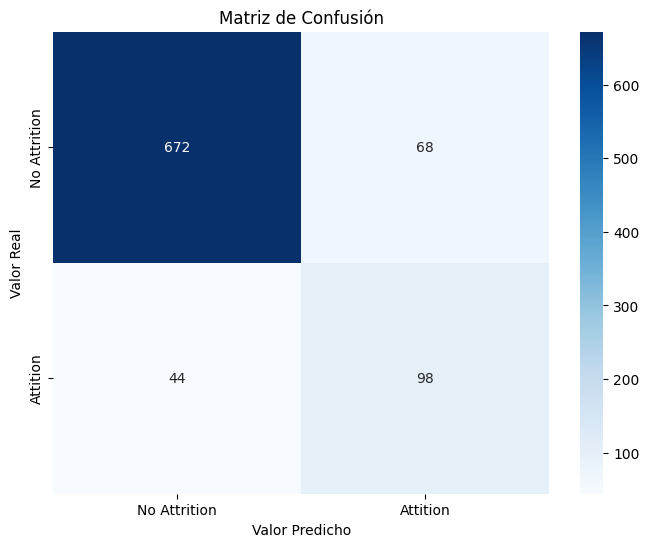

In [ ]:
#Ver el permormace del modelo con los daros de test
y_pred_test = dt.predict(X_test_scaled)
metrics_score(y_test, y_pred_test, labels=['No Attrition','Attition'])

In [ ]:
#Graficar la importancia de las variables y ver cuales son las mas importantes
importances = pd.DataFrame({'feature':X.columns, 'importance': np.round(dt.feature_importances_,3)})
importances.sort_values('importance', ascending=False).set_index('feature')

importance
feature                                      
OverTime                                0.134
MonthlyIncome                           0.079
Age                                     0.078
TotalWorkingYears                       0.077
HourlyRate                              0.066
NumCompaniesWorked                      0.053
MonthlyRate                             0.051
DailyRate                               0.050
PercentSalaryHike                       0.039
DistanceFromHome                        0.032
WorkLifeBalance                         0.030
TrainingTimesLastYear                   0.029
JobRole_Sales Executive                 0.028
RelationshipSatisfaction                0.025
JobRole_Research Scientist              0.024
MaritalStatus_Single                    0.022
JobLevel_3                              0.016
YearsSinceLastPromotion                 0.015
StockOptionLevel                        0.015
JobRole_Sales Representative            0.014
BusinessTravel_Travel_Rarely            0.013
JobSatisfaction                         0.013
JobRole_Manufacturing Director          0.011
JobInvolvement_4                        0.011
YearsWithCurrManager                    0.010
Education_4                             0.009
EducationField_Other                    0.008
EnvironmentSatisfaction_2               0.007
YearsInCurrentRole                      0.006
JobInvolvement_3                        0.005
JobLevel_2                              0.005
EducationField_Medical                  0.005
YearsAtCompany                          0.003
BusinessTravel_Travel_Frequently        0.003
JobRole_Human Resources                 0.003
EnvironmentSatisfaction_4               0.003
EducationField_Marketing                0.003
Education_5                             0.003
EducationField_Technical Degree         0.002
PerformanceRating                       0.000
EnvironmentSatisfaction_3               0.000
Department_Research & Development       0.000
Education_3                             0.000
Education_2                             0.000
Department_Sales                        0.000
EducationField_Life Sciences            0.000
JobInvolvement_2                        0.000
Gender_Male                             0.000
JobLevel_4                              0.000
JobLevel_5                              0.000
JobRole_Laboratory Technician           0.000
JobRole_Manager                         0.000
JobRole_Research Director               0.000
MaritalStatus_Married                   0.000

- De acuerdo con el árbol de decisión, *Overtime es la característica más importante, seguida de onthly income, Age, total working years, y MonthlyRate.*
- Esto podría significar que las personas que están en riesgo de abandono tienen bajos ingresos, están haciendo horas extras y tienen menos experiencia.
- Las otras características importantes son DailyRate, NumCompaniesWorked, JobRole_Sales Executive y PercentSalaryHike.

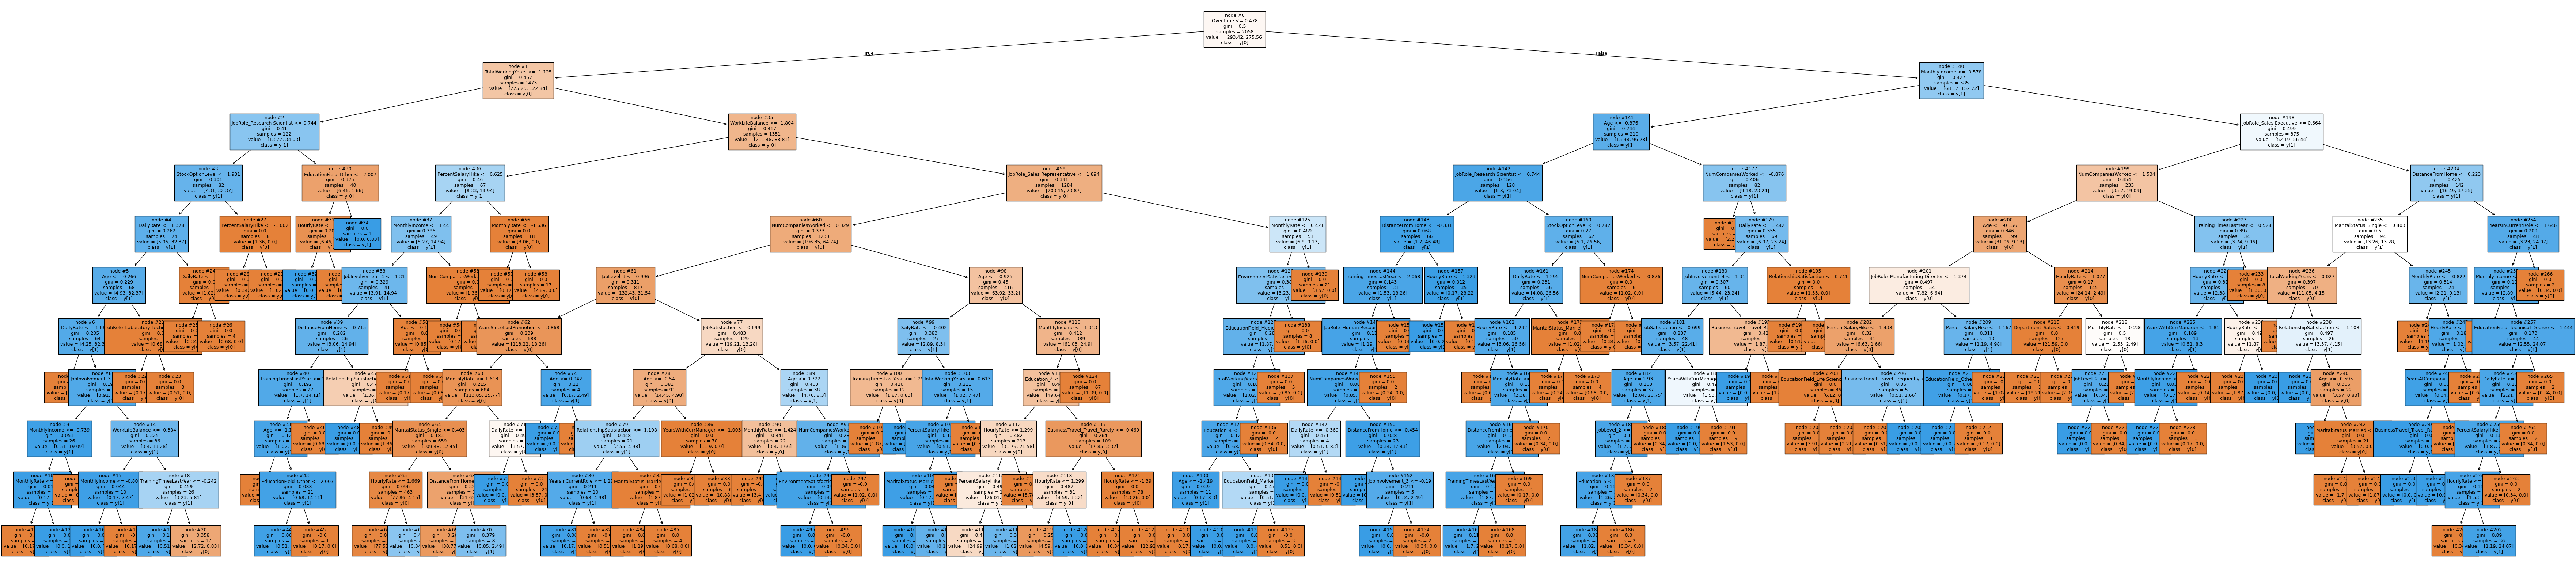

In [ ]:
#Graficar el Árbol de decision
feature_names = X_train.columns
plt.figure(figsize=(90,20))

tree.plot_tree(dt, feature_names=feature_names, filled=True, fontsize=9, class_names=True, node_ids=True)
plt.show()

##Maquina de vectores de soporte
* Los modelos de Máquinas de Vectores de Soporte (SVM) son clasificadores potentes que separan las clases buscando una frontera óptima. Sin embargo, no todos los problemas son lineales

### ¿Qué es un Kernel?
Un kernel es una función matemática que permite proyectar los datos a un espacio de mayor dimensión, donde es más fácil encontrar una frontera de separación entre clases.

1. *Kernel lineal*
* Supone que las clases pueden separarse con una línea recta.
2. *Kernel RBF (Radial Basis Function)*
* Permite generar fronteras curvas y flexibles, adaptándose a distribuciones más complejas.

In [ ]:
# Función para graficar los límites de decisión
def plot_svm(model, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

In [ ]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC

X_circ, y_circ = make_circles(n_samples=400, noise=0.1, factor=0.4, random_state=1)

# Entrenamos SVM con kernel lineal
svm_lin = SVC(kernel='linear').fit(X_circ, y_circ)

# Entrenamos SVM con kernel rbf
svm_rbf = SVC(kernel='rbf').fit(X_circ, y_circ)

svm_lin


SVC(kernel='linear')

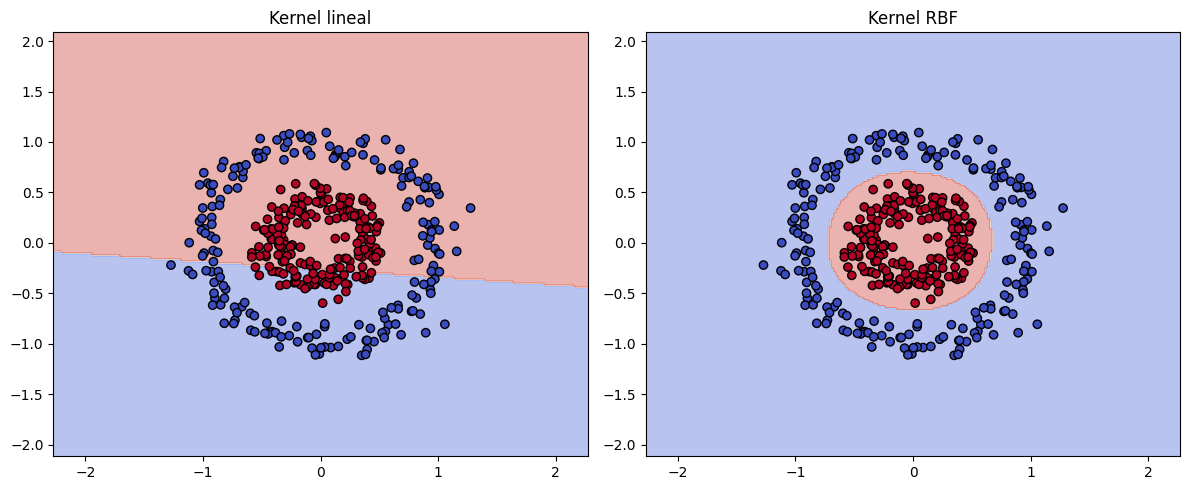

In [ ]:
#Grafica
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_svm(svm_lin, X_circ, y_circ, axs[0], 'Kernel lineal')
plot_svm(svm_rbf, X_circ, y_circ, axs[1], 'Kernel RBF')
plt.tight_layout()
plt.show()

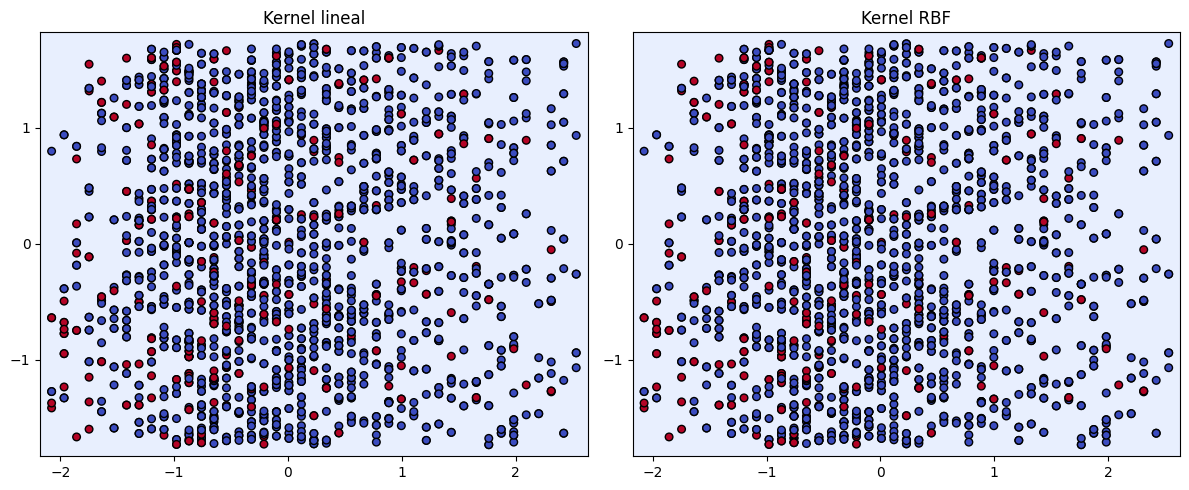

In [ ]:
X_plot = X_train_scaled.iloc[:,:2].values
y_plot = y_train.values
#Entrenar SVM con kernel lineal y rbf

svm_lin = SVC(kernel='linear').fit(X_plot, y_plot)
svm_rbf = SVC(kernel='rbf').fit(X_plot, y_plot)

#Graficar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_svm(svm_lin, X_plot, y_plot, axs[0], 'Kernel lineal')
plot_svm(svm_rbf, X_plot, y_plot, axs[1], 'Kernel RBF')
plt.tight_layout()
plt.show()

In [ ]:
X_train_scaled[['OverTime', 'BusinessTravel_Travel_Frequently']]

OverTime  BusinessTravel_Travel_Frequently
0    -0.630197                         -0.481246
1    -0.630197                         -0.481246
2     1.586805                         -0.481246
3     1.586805                         -0.481246
4     1.586805                         -0.481246
...        ...                               ...
2053 -0.630197                         -0.481246
2054 -0.630197                          2.077939
2055 -0.630197                         -0.481246
2056  1.586805                         -0.481246
2057 -0.630197                         -0.481246

[2058 rows x 2 columns]

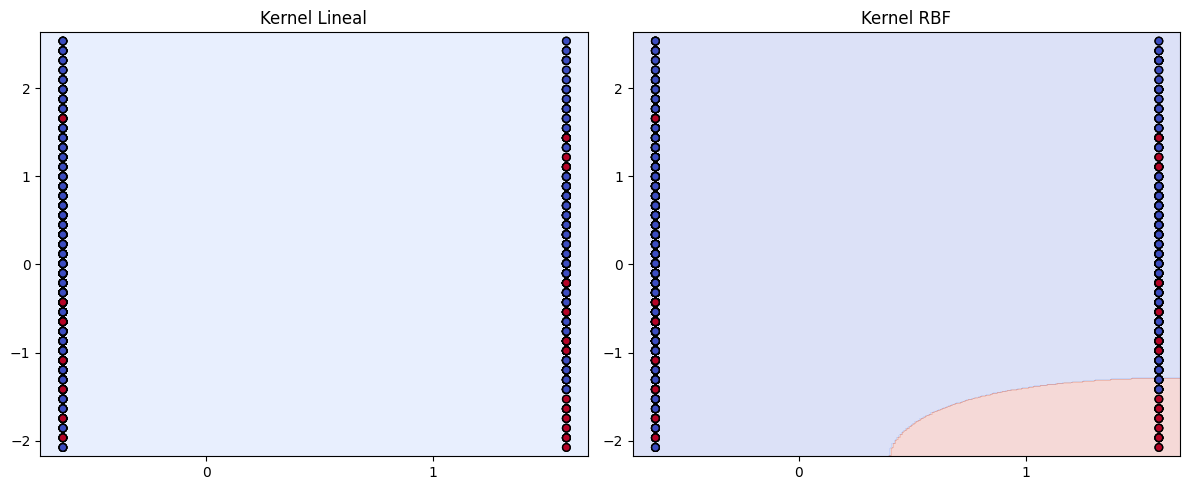

In [ ]:
X_plot = X_train_scaled[['OverTime', 'Age']].values
y_plot = y_train.values

# Entrenar SVM con kernel lineal y RBF
svm_lin = SVC(kernel='linear').fit(X_plot, y_plot)
svm_rbf = SVC(kernel='rbf').fit(X_plot, y_plot)

# #GRAFICAR
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_svm(svm_lin, X_plot, y_plot, axs[0], 'Kernel Lineal')
plot_svm(svm_rbf, X_plot, y_plot, axs[1], 'Kernel RBF')
plt.tight_layout()
plt.show()


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.95      1.00      0.97      1726
    Attition       0.99      0.74      0.84       332

    accuracy                           0.96      2058
   macro avg       0.97      0.87      0.91      2058
weighted avg       0.96      0.96      0.95      2058


Matriz de confusión:
[[1723    3]
 [  87  245]]


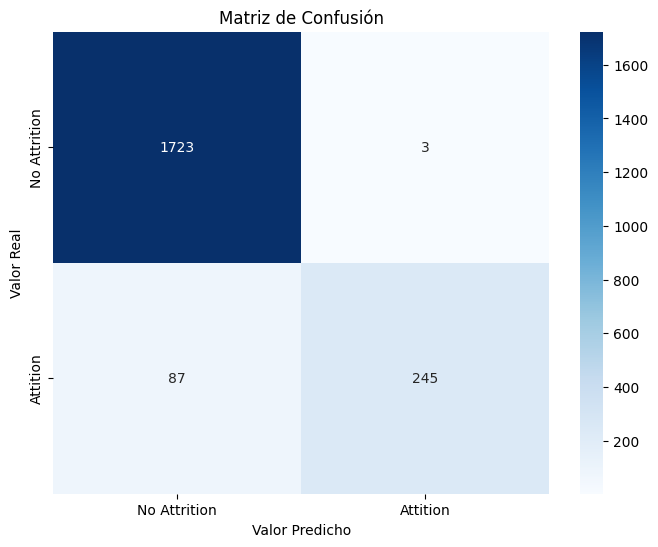

In [ ]:
#SVM con kernel rbf
svm_rbf = SVC(kernel='rbf', probability = True)
svm_rbf.fit(X_train_scaled,y_train)

y_pred_train = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train, labels=['No Attrition','Attition'])


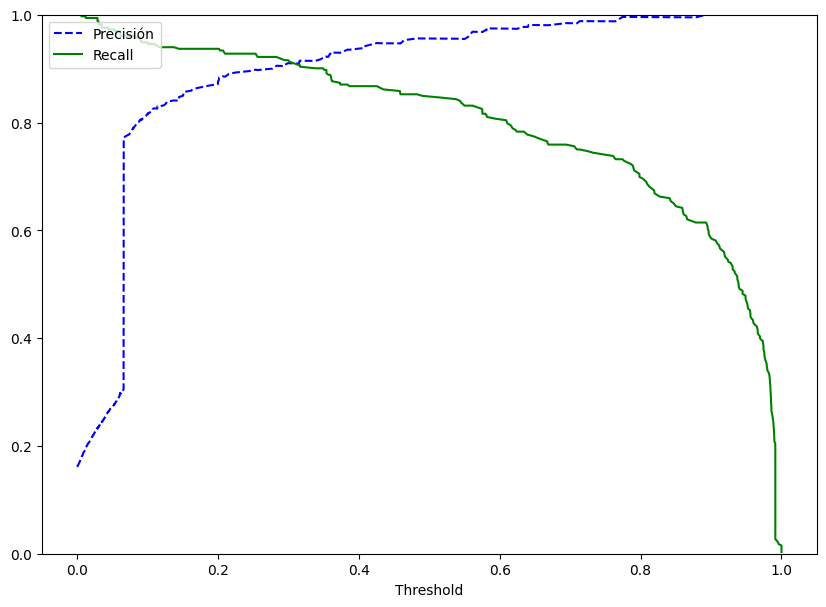

In [ ]:
y_scores_svm_rbf = svm_rbf.predict_proba(X_train_scaled)
precisions_svm_rbf, recalls_svm_rbf, thresholds_svm_rbf = precision_recall_curve(y_train, y_scores_svm_rbf[:,1])
#Graficar curva precision recall
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm_rbf, precisions_svm_rbf[:-1], "b--", label="Precisión")
plt.plot(thresholds_svm_rbf, recalls_svm_rbf[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.98      0.98      0.98      1726
    Attition       0.92      0.90      0.91       332

    accuracy                           0.97      2058
   macro avg       0.95      0.94      0.95      2058
weighted avg       0.97      0.97      0.97      2058


Matriz de confusión:
[[1700   26]
 [  34  298]]


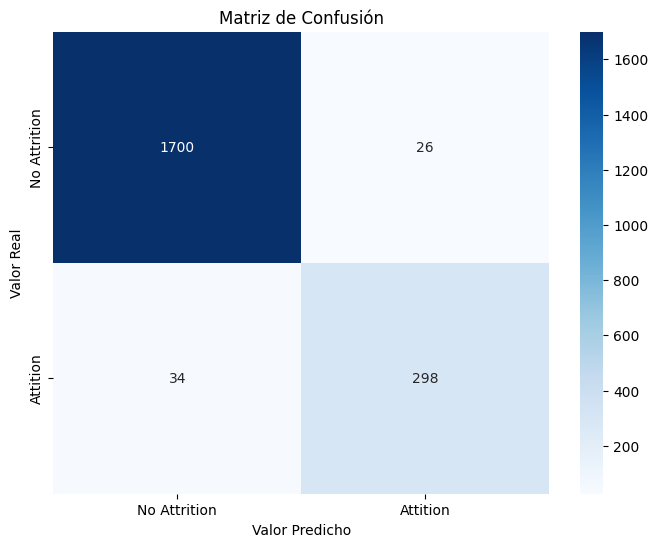

In [ ]:
optimal_threshold = .35
y_pred_optimal = svm_rbf.predict_proba(X_train_scaled)[:,1:]>= optimal_threshold
metrics_score(y_train, y_pred_optimal, labels=['No Attrition','Attition'])


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.96      0.95      0.95       740
    Attition       0.74      0.82      0.78       142

    accuracy                           0.93       882
   macro avg       0.85      0.88      0.87       882
weighted avg       0.93      0.93      0.93       882


Matriz de confusión:
[[700  40]
 [ 26 116]]


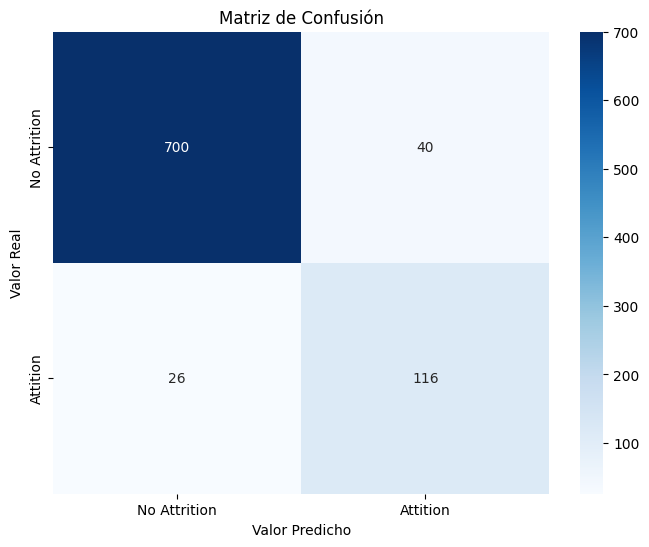

In [ ]:
optimal_threshold = .35
y_pred_test_optimal = svm_rbf.predict_proba(X_test_scaled)[:,1:]>= optimal_threshold
metrics_score(y_test, y_pred_test_optimal, labels=['No Attrition','Attition'])

## Bosque aleatorio


In [ ]:
#Random Forest
rf_model = RandomForestClassifier(class_weight={0:0.17, 1:0.83}, n_estimators=100, random_state=1)
rf_model.fit(X_train_scaled,y_train)
rf_model

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [ ]:
len(rf_model.estimators_)

100


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       1.00      1.00      1.00      1726
    Attition       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058


Matriz de confusión:
[[1726    0]
 [   0  332]]


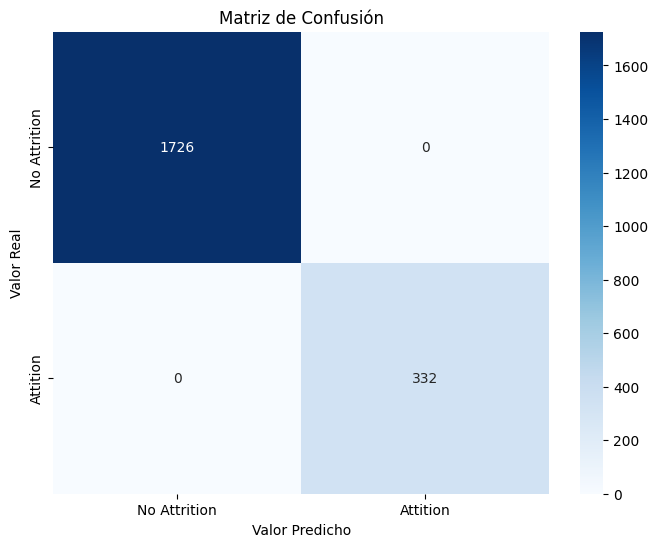

In [ ]:
y_pred_rf = rf_model.predict(X_train_scaled)
metrics_score(y_train, y_pred_rf, labels=['No Attrition','Attition'])


Reporte de clasificación:
              precision    recall  f1-score   support

No Attrition       0.96      0.99      0.98       740
    Attition       0.95      0.79      0.86       142

    accuracy                           0.96       882
   macro avg       0.95      0.89      0.92       882
weighted avg       0.96      0.96      0.96       882


Matriz de confusión:
[[734   6]
 [ 30 112]]


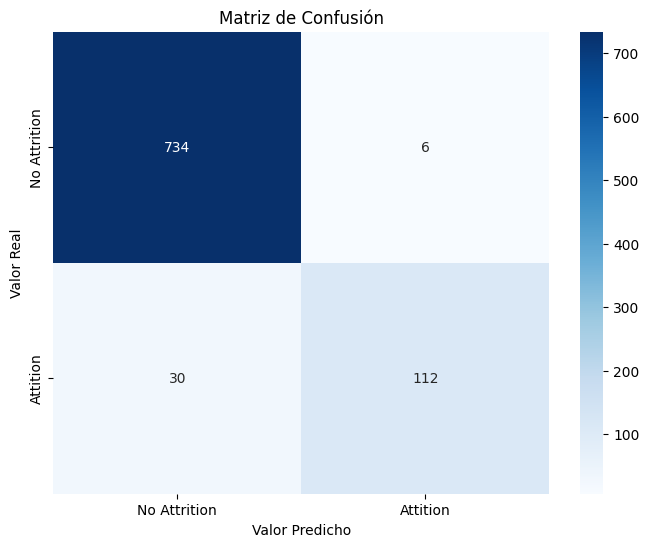

In [ ]:
y_pred_test_rf = rf_model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_rf, labels=['No Attrition','Attition'])
#

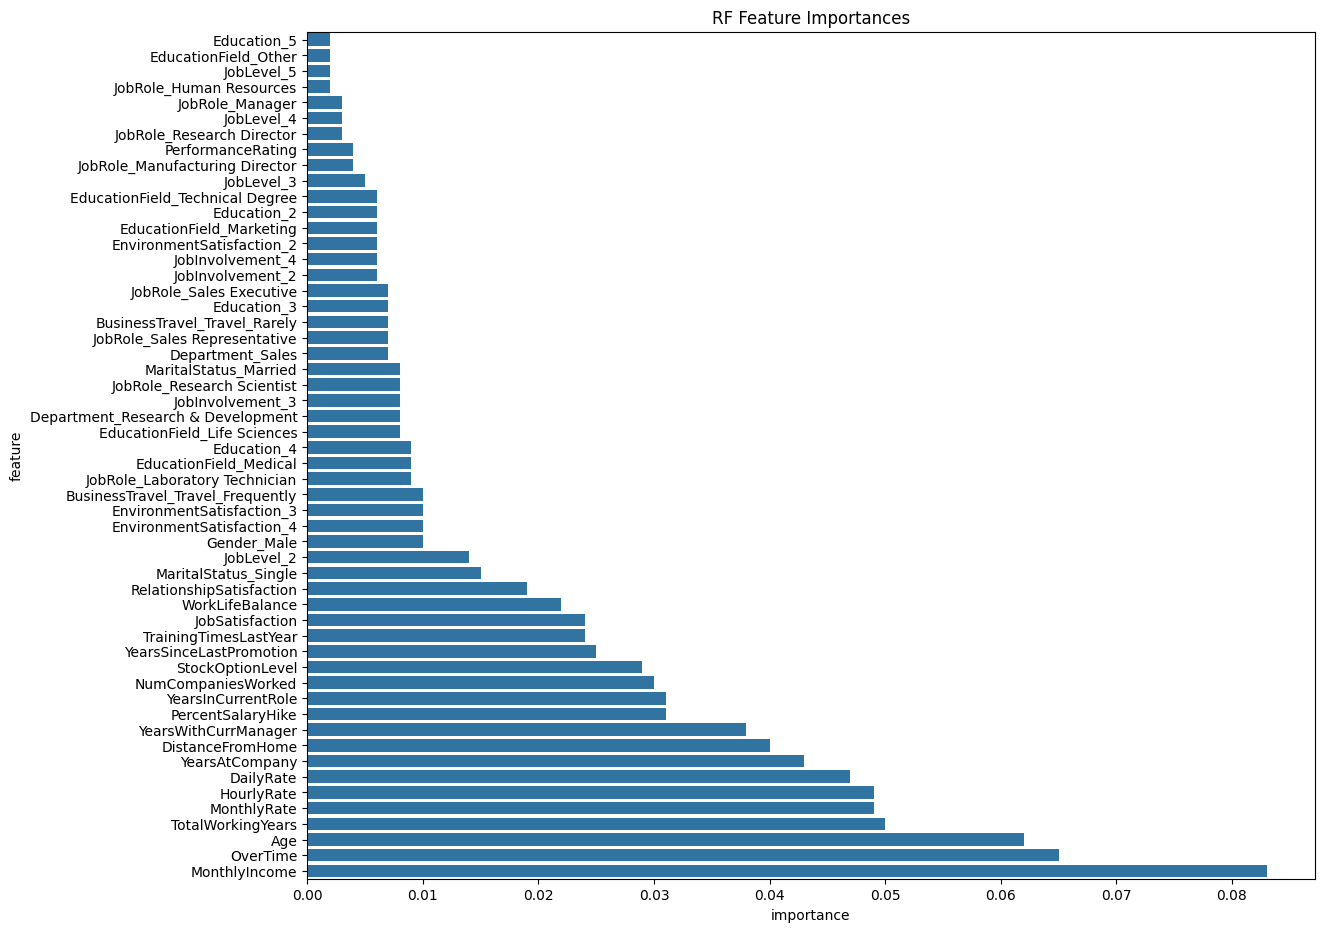

In [ ]:
rf_model_importances = pd.DataFrame({'feature':X.columns, 'importance':np.round(rf_model.feature_importances_, 3)})
rf_model_importances = rf_model_importances.sort_values('importance', ascending=True).set_index('feature')

plt.figure(figsize=(13,11))
sns.barplot(y=rf_model_importances.index, x=rf_model_importances['importance'])
plt.title('RF Feature Importances')
plt.show()